#### IMPORTING LIBRARIES

In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### DATA PREPROCESSING 

In [31]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

lb.fit(df.sex.drop_duplicates())
df.sex=lb.transform(df.sex)

lb.fit(df.smoker.drop_duplicates())
df.smoker=lb.transform(df.smoker)

lb.fit(df.region.drop_duplicates())
df.region=lb.transform(df.region)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int32
region      1338 non-null int32
charges     1338 non-null float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


#### CHECKING FOR NaN VALUES

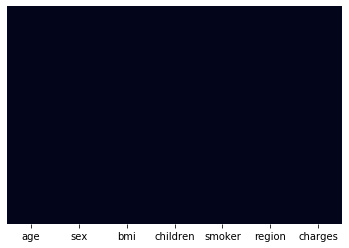

In [61]:
df.isnull().sum()
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

#### HEATMAP

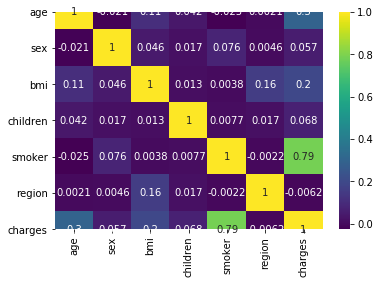

In [62]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

#### VISUAL REPRESENTATION OF DIFFERENT COLUMNS

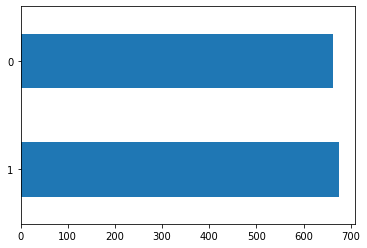

In [63]:
df['sex'].value_counts().plot.barh()

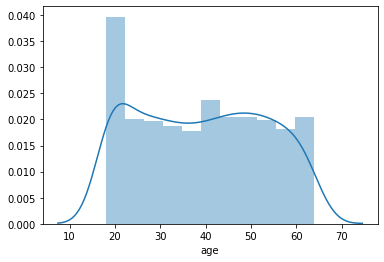

In [64]:
sns.distplot(df['age'])

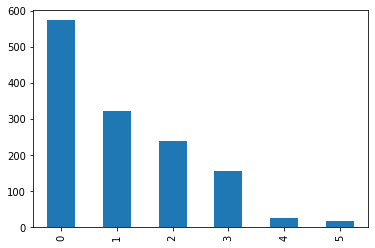

In [65]:
df['children'].value_counts().plot.bar()

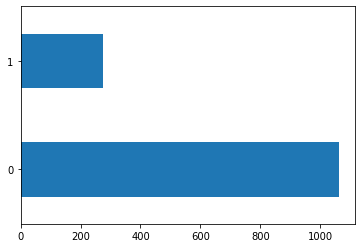

In [66]:
df['smoker'].value_counts().plot.barh()

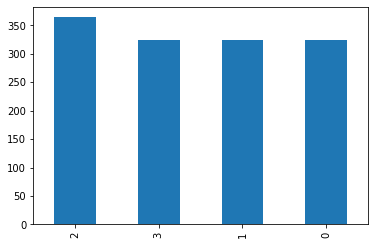

In [68]:
df['region'].value_counts().plot.bar()

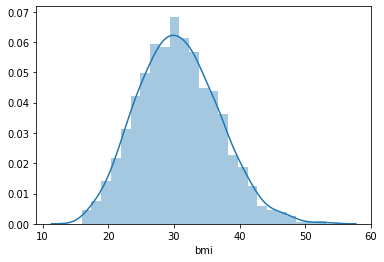

In [69]:
sns.distplot(df['bmi'])

Text(0.5, 1.0, 'Distribution of insurance charges')

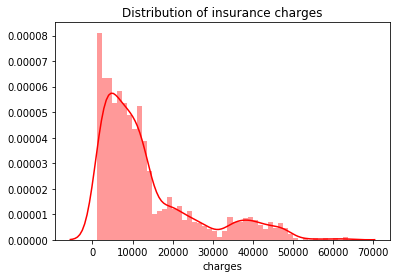

In [70]:
sns.distplot(df['charges'],bins=50,color='r')
plt.title("Distribution of insurance charges")

######  CHARGES IS RIGHT SCREWED 

Text(0.5, 1.0, 'Distribution of insurance charges in LOG SCALE')

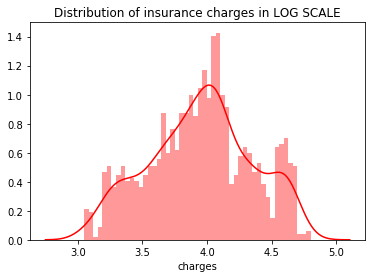

In [71]:
sns.distplot(np.log10(df['charges']),bins=50,color='r')
plt.title("Distribution of insurance charges in LOG SCALE")

####  DATA ANALYSIS

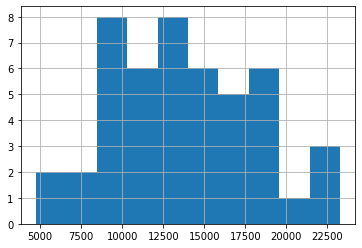

In [72]:
df['charges'].groupby(df['age']).mean().sort_values().hist()

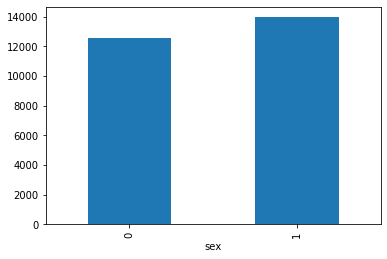

In [73]:
df1=df['charges'].groupby(df['sex']).mean().sort_values()
df1.plot.bar()

In [74]:
df1=df['charges'].groupby(df['children']).mean().sort_values()
df1.head()

children
5     8786.035247
0    12365.975602
1    12731.171832
4    13850.656311
2    15073.563734
Name: charges, dtype: float64

smoker
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: charges, dtype: object

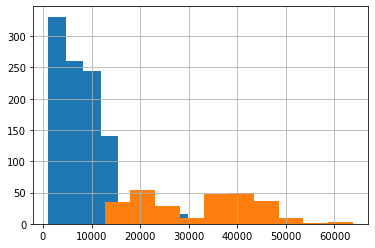

In [75]:
df1=df['charges'].groupby(df['smoker'])
df1.hist()

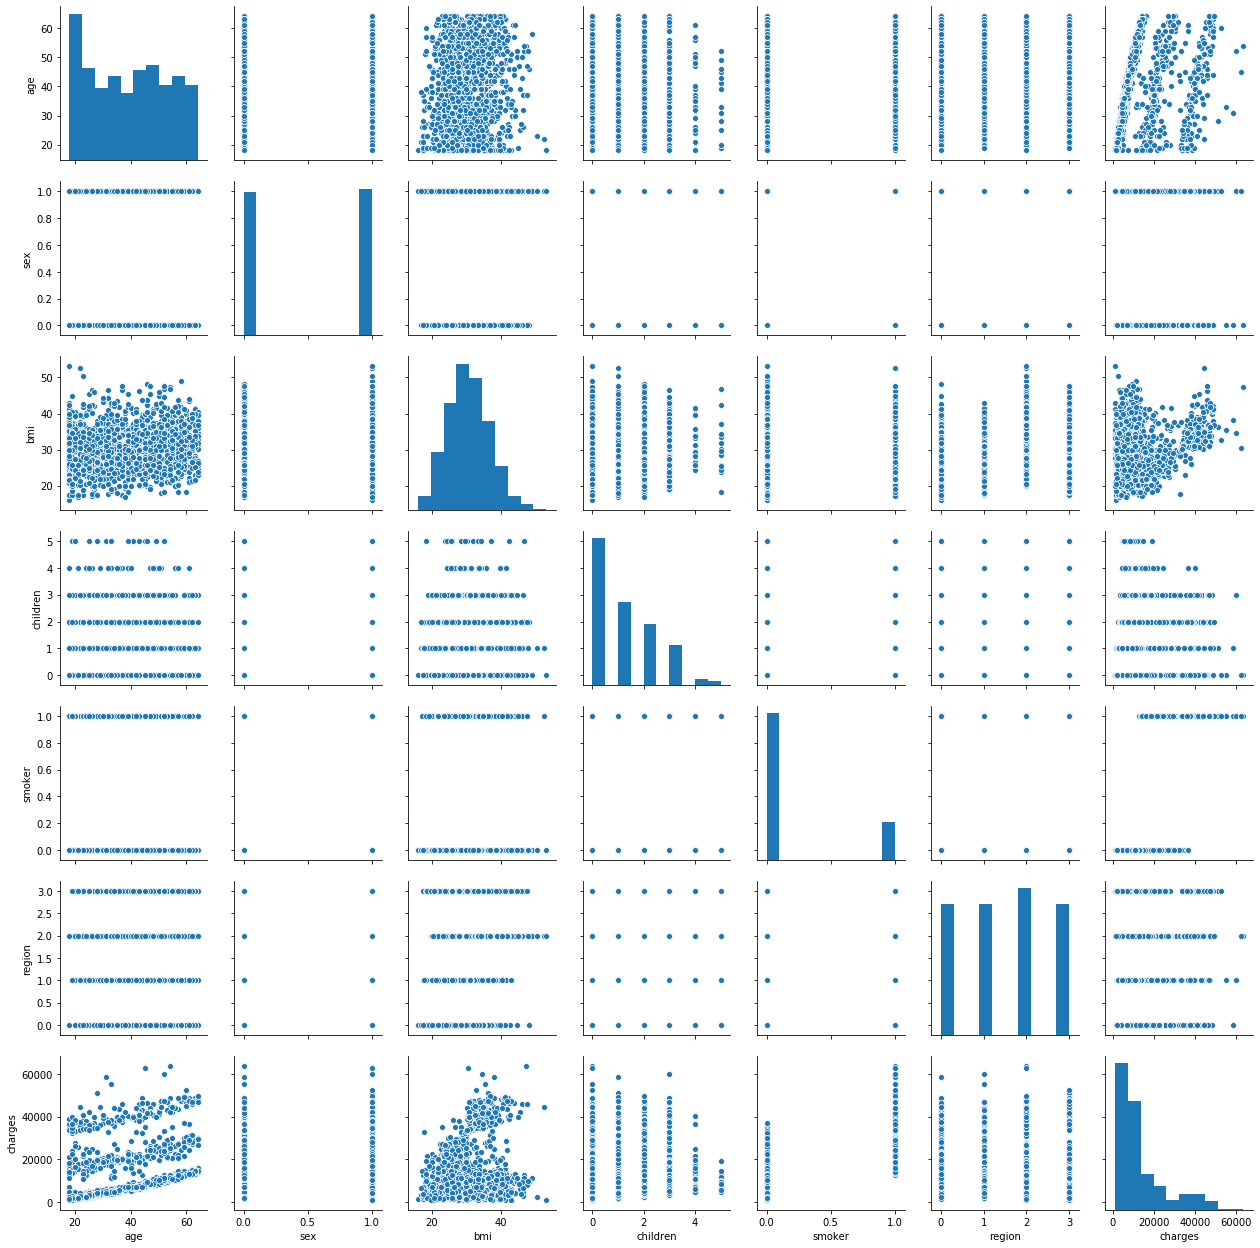

In [76]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


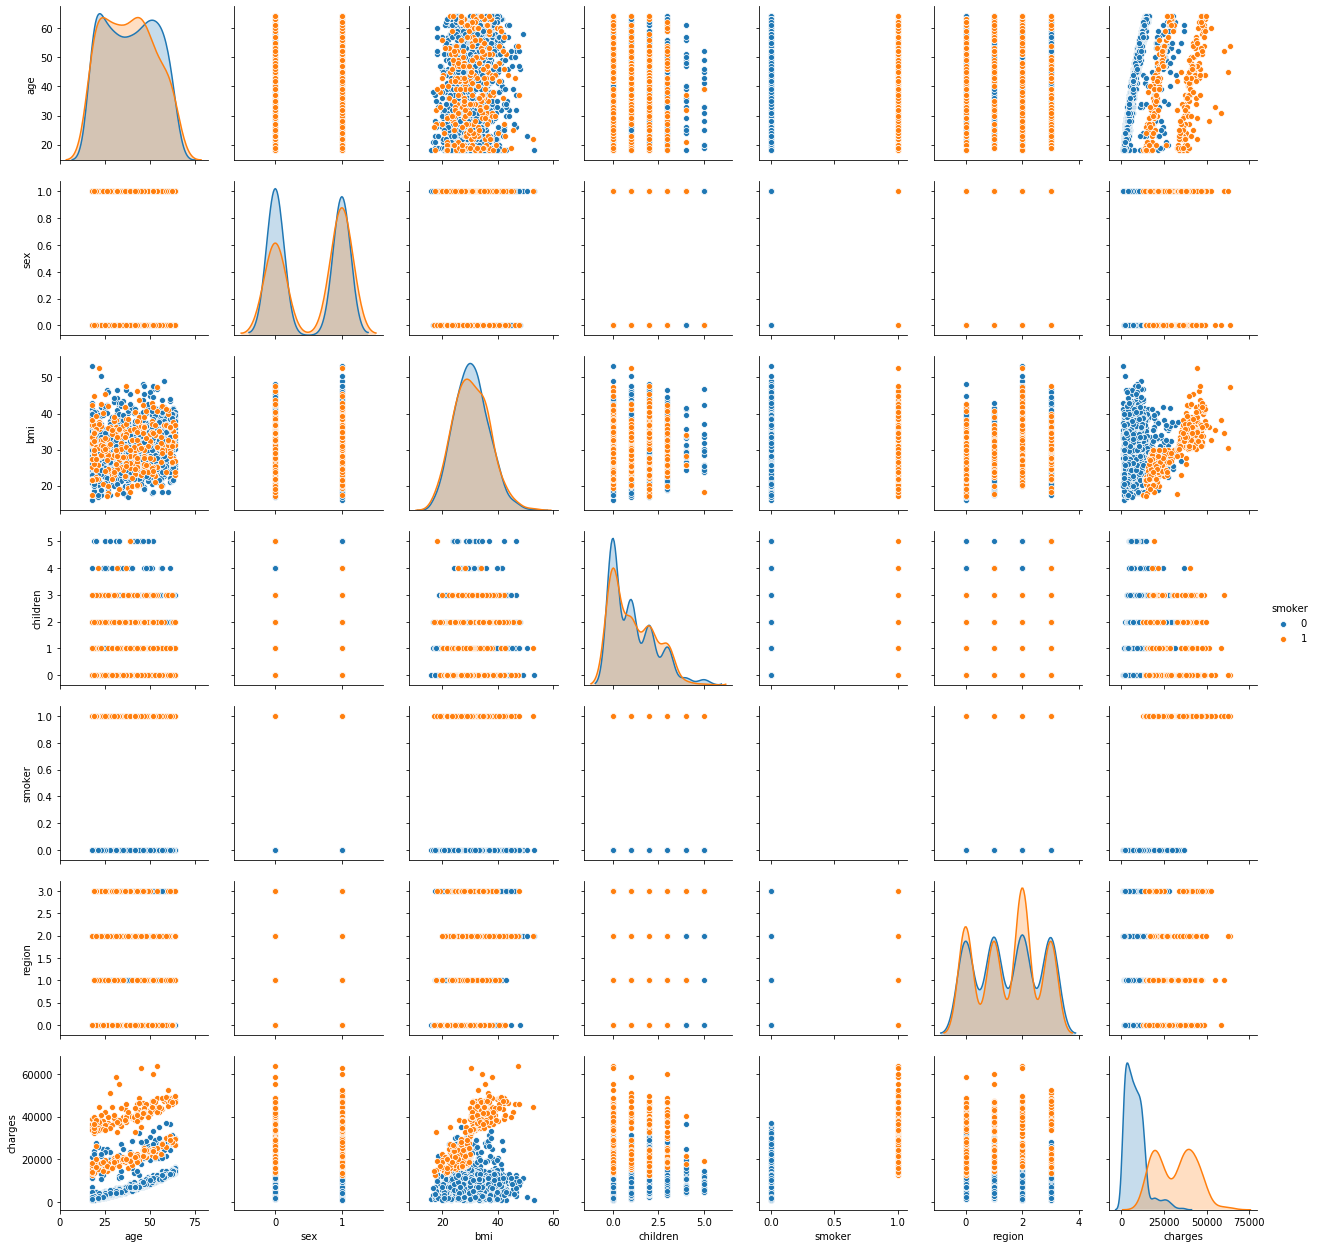

In [77]:
sns.pairplot(df,hue='smoker')

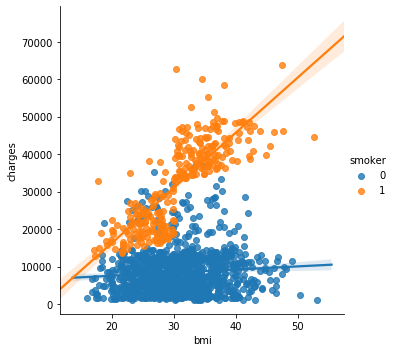

In [78]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df)

#### TRAIN TEST SPLIT

In [38]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='charges')
y=np.log10(df['charges'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

#### IMPORTING DIFFERNT MODELS

In [49]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#### USER DEFINED FUNCTION FOR MODEL SCORE

In [50]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()
    
def evaluate(true, predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return  mae,mse,rmse,r2_square

#### REGRESSION MODELS

In [51]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

pred=lr.predict(X_test)

result=pd.DataFrame(data=[['Linear Regression', *evaluate(y_test,pred),cross_val(LinearRegression())]],
                    columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result

,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.09055,0.02605,0.161399,0.839715,0.761177


In [52]:
from sklearn.linear_model import Ridge

model=Ridge()
model.fit(X_train,y_train)

pred=model.predict(X_test)

res=pd.DataFrame(data=[['Ridge Regression', *evaluate(y_test,pred),cross_val(Ridge())]],
                    columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result=result.append(res,ignore_index=True)
result

,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.090550,0.026050,0.161399,0.839715,0.761177
1,Ridge Regression,0.090087,0.026015,0.161293,0.839926,0.761165


In [53]:
from sklearn.linear_model import Lasso

model=Lasso()
model.fit(X_train,y_train)

pred=model.predict(X_test)

res=pd.DataFrame(data=[['Lasso Regression', *evaluate(y_test,pred),cross_val(Ridge())]],
                   columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result=result.append(res,ignore_index=True)
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6375683002163335, tolerance: 0.01260794870864827
  positive)


,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.090550,0.026050,0.161399,0.839715,0.761177
1,Ridge Regression,0.090087,0.026015,0.161293,0.839926,0.761165
2,Lasso Regression,0.121999,0.037658,0.194056,0.768291,0.761165


In [54]:
from sklearn.linear_model import ElasticNet

model=ElasticNet()
model.fit(X_train,y_train)

pred=model.predict(X_test)

res=pd.DataFrame(data=[['Elastic Net', *evaluate(y_test,pred),cross_val(ElasticNet())]],
                   columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result=result.append(res,ignore_index=True)
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.097359352061867, tolerance: 0.01260794870864827
  positive)


,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.090550,0.026050,0.161399,0.839715,0.761177
1,Ridge Regression,0.090087,0.026015,0.161293,0.839926,0.761165
2,Lasso Regression,0.121999,0.037658,0.194056,0.768291,0.761165
3,Elastic Net,0.120525,0.037121,0.192667,0.771595,0.261064


In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
X_new=poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)

lr=LinearRegression()
lr.fit(X_train,y_train)


pred=lr.predict(X_test)

res=pd.DataFrame(data=[['Polynomial Features (2)', *evaluate(y_test,pred),cross_val(LinearRegression())]],
                    columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result=result.append(res,ignore_index=True)
result

,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.090550,0.026050,0.161399,0.839715,0.761177
1,Ridge Regression,0.090087,0.026015,0.161293,0.839926,0.761165
2,Lasso Regression,0.121999,0.037658,0.194056,0.768291,0.761165
3,Elastic Net,0.120525,0.037121,0.192667,0.771595,0.261064
4,Polynomial Features (2),0.088397,0.025100,0.158430,0.845558,0.761177


In [56]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=3)
X_new=poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=42)

lr=LinearRegression()
lr.fit(X_train,y_train)


pred=lr.predict(X_test)

res=pd.DataFrame(data=[['Polynomial Features (3)', *evaluate(y_test,pred),cross_val(LinearRegression())]],
                    columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result=result.append(res,ignore_index=True)
result

,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.090550,0.026050,0.161399,0.839715,0.761177
1,Ridge Regression,0.090087,0.026015,0.161293,0.839926,0.761165
2,Lasso Regression,0.121999,0.037658,0.194056,0.768291,0.761165
3,Elastic Net,0.120525,0.037121,0.192667,0.771595,0.261064
4,Polynomial Features (2),0.088397,0.025100,0.158430,0.845558,0.761177
5,Polynomial Features (3),0.090550,0.026050,0.161399,0.839715,0.761177


#### KNN

In [57]:
model=KNeighborsRegressor()
model.fit(X_train,y_train)

pred=model.predict(X_test)

res=pd.DataFrame(data=[['KNeighborsRegressor', *evaluate(y_test,pred),cross_val(KNeighborsRegressor())]],
                    columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result=result.append(res,ignore_index=True)
result

,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.090550,0.026050,0.161399,0.839715,0.761177
1,Ridge Regression,0.090087,0.026015,0.161293,0.839926,0.761165
2,Lasso Regression,0.121999,0.037658,0.194056,0.768291,0.761165
3,Elastic Net,0.120525,0.037121,0.192667,0.771595,0.261064
4,Polynomial Features (2),0.088397,0.025100,0.158430,0.845558,0.761177
5,Polynomial Features (3),0.090550,0.026050,0.161399,0.839715,0.761177
6,KNeighborsRegressor,0.266324,0.125139,0.353751,0.230012,0.301511



##### DECISION TREE

In [58]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

pred=model.predict(X_test)

res=pd.DataFrame(data=[['DecisionTreeRegressor', *evaluate(y_test,pred),cross_val(DecisionTreeRegressor())]],
                    columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result=result.append(res,ignore_index=True)
result

,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.090550,0.026050,0.161399,0.839715,0.761177
1,Ridge Regression,0.090087,0.026015,0.161293,0.839926,0.761165
2,Lasso Regression,0.121999,0.037658,0.194056,0.768291,0.761165
3,Elastic Net,0.120525,0.037121,0.192667,0.771595,0.261064
4,Polynomial Features (2),0.088397,0.025100,0.158430,0.845558,0.761177
5,Polynomial Features (3),0.090550,0.026050,0.161399,0.839715,0.761177
6,KNeighborsRegressor,0.266324,0.125139,0.353751,0.230012,0.301511
7,DecisionTreeRegressor,0.113681,0.060975,0.246931,0.624820,0.651671


#### SVM

In [59]:
model=SVR(gamma='auto')
model.fit(X_train,y_train)

pred=model.predict(X_test)

res=pd.DataFrame(data=[['SVR', *evaluate(y_test,pred),cross_val(SVR())]],
                    columns=['Model','MAE','MSE','RMSE','r2','Cross Validation '])
result=result.append(res,ignore_index=True)
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

,Model,MAE,MSE,RMSE,r2,Cross Validation
0,Linear Regression,0.090550,0.026050,0.161399,0.839715,0.761177
1,Ridge Regression,0.090087,0.026015,0.161293,0.839926,0.761165
2,Lasso Regression,0.121999,0.037658,0.194056,0.768291,0.761165
3,Elastic Net,0.120525,0.037121,0.192667,0.771595,0.261064
4,Polynomial Features (2),0.088397,0.025100,0.158430,0.845558,0.761177
5,Polynomial Features (3),0.090550,0.026050,0.161399,0.839715,0.761177
6,KNeighborsRegressor,0.266324,0.125139,0.353751,0.230012,0.301511
7,DecisionTreeRegressor,0.113681,0.060975,0.246931,0.624820,0.651671
8,SVR,0.326877,0.163562,0.404428,-0.006402,0.579700
